In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pathlib

train = pathlib.Path('emotion-small/train')
test = pathlib.Path('emotion-small/test')

In [3]:
class_name = np.array([item.name for item in train.glob('*') if item.name != "LICENSE.txt" ])
output_class_units = len(class_name)
print(output_class_units)

image_count = len(list(train.glob('*/*.png')))

6


In [4]:
class_name

array(['bosan', 'malas', 'marah', 'sedih', 'senang', 'terkejut'],
      dtype='<U8')

In [5]:
img_height = 48
img_width = 48
input_shape = 48,48,1

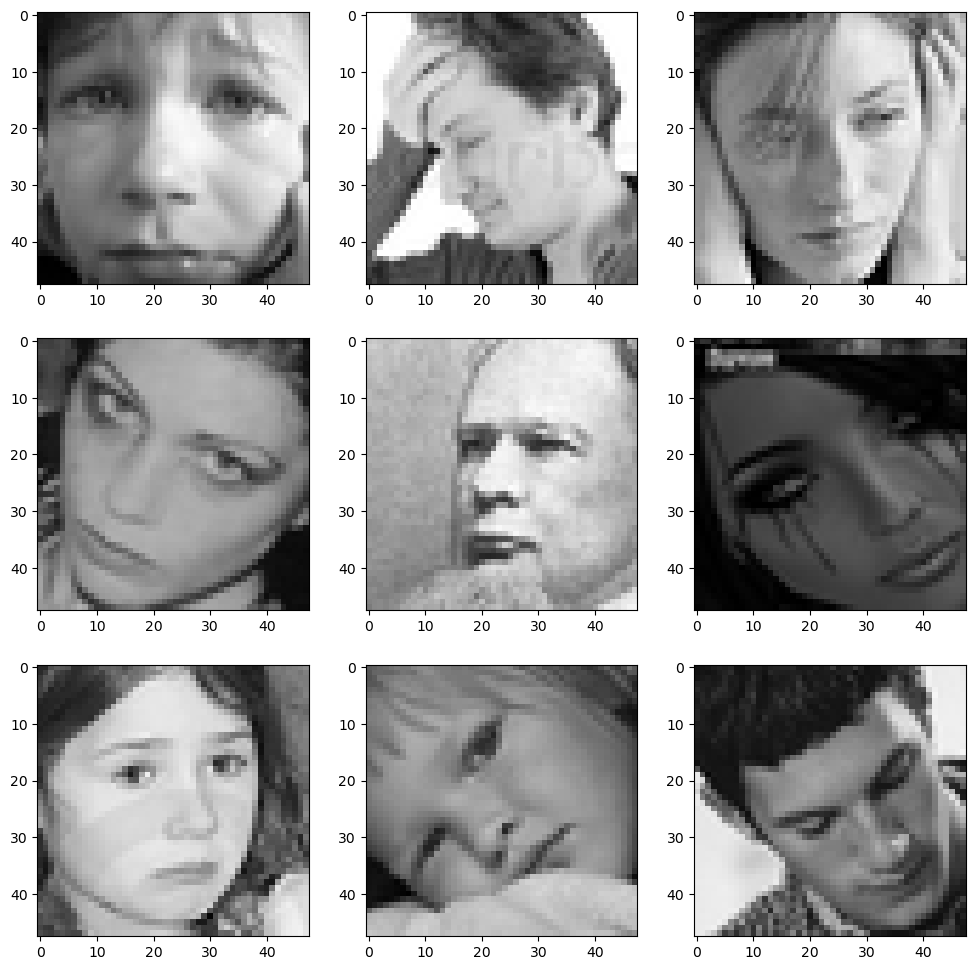

In [6]:
path = 'emotion-small/train/sedih/'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+os.listdir(path)[i], target_size=(img_height, img_width))
    plt.imshow(img)   
plt.show()

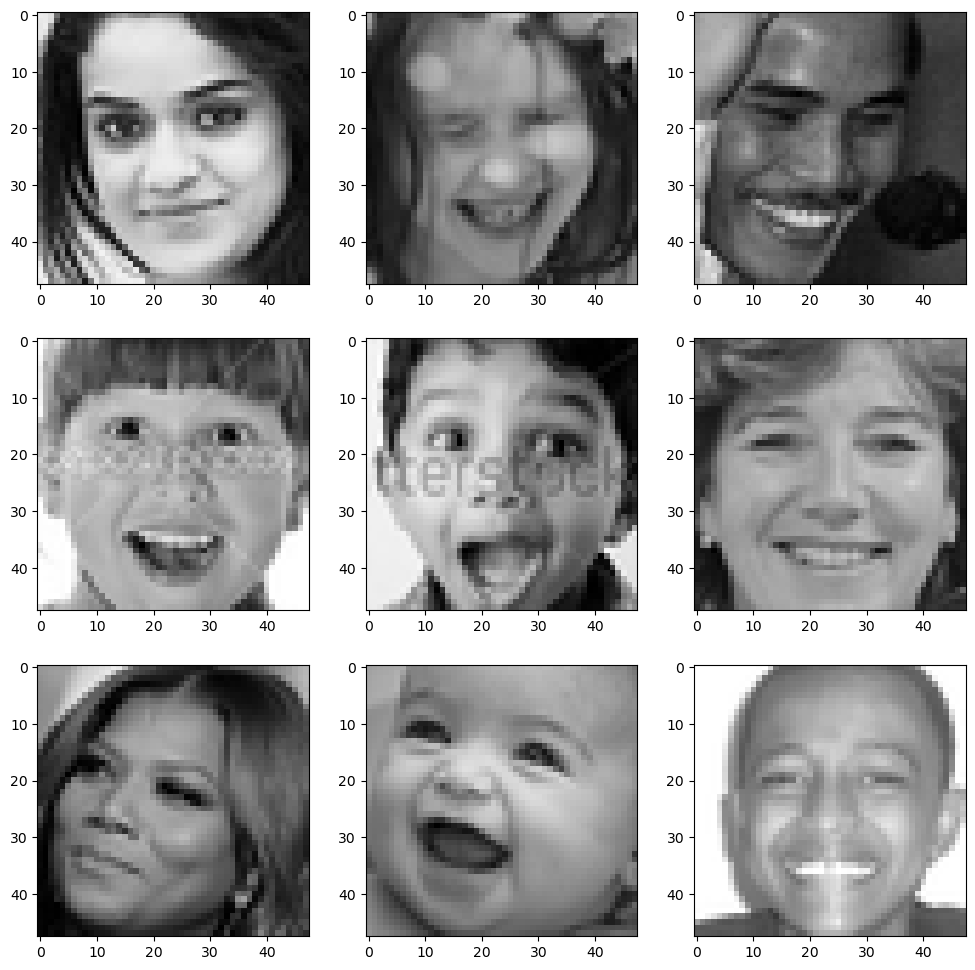

In [7]:
path = 'emotion-small/test/senang/'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+os.listdir(path)[i], target_size=(img_height, img_width))
    plt.imshow(img)   
plt.show()

In [42]:
# batch_size = 128
# img_height = 48
# img_width = 48

# train_gen = tf.keras.utils.image_dataset_from_directory(
#   str(train),
#   validation_split=0.2,
#   subset='training',
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# val_gen = tf.keras.utils.image_dataset_from_directory(
#   str(train),
#   validation_split=0.2,
#   subset='validation',
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

Found 600 files belonging to 6 classes.
Using 480 files for training.
Found 600 files belonging to 6 classes.
Using 120 files for validation.


In [8]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory = train,
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(directory = test,
                                                  target_size = (48,48),
                                                  batch_size = 32,
                                                  color_mode = "grayscale",
                                                  class_mode = "categorical")

Found 900 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 

model.add(Dense(100,activation = 'relu'))

model.add(Dense(50,activation = 'relu'))

model.add(Dense(225,activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 256)       2

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs=100,
    batch_size=32)

Epoch 1/100
29/29 [==============================] - 174s 6s/step - loss: 2.2654 - accuracy: 0.1800 - val_loss: 1.9884 - val_accuracy: 0.1633
Epoch 2/100
29/29 [==============================] - 168s 6s/step - loss: 2.0947 - accuracy: 0.1744 - val_loss: 1.8879 - val_accuracy: 0.1600
Epoch 3/100
29/29 [==============================] - 181s 6s/step - loss: 2.0423 - accuracy: 0.1889 - val_loss: 1.8507 - val_accuracy: 0.1967
Epoch 4/100
29/29 [==============================] - 186s 6s/step - loss: 1.9933 - accuracy: 0.1922 - val_loss: 1.8466 - val_accuracy: 0.1667
Epoch 5/100
29/29 [==============================] - 146s 5s/step - loss: 1.9866 - accuracy: 0.2000 - val_loss: 2.0024 - val_accuracy: 0.1667
Epoch 6/100
29/29 [==============================] - 135s 5s/step - loss: 1.9762 - accuracy: 0.1889 - val_loss: 2.2246 - val_accuracy: 0.1667
Epoch 7/100
29/29 [==============================] - 145s 5s/step - loss: 1.9177 - accuracy: 0.2233 - val_loss: 2.1816 - val_accuracy: 0.1667
Epoch 

In [14]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
  json_file.write(model_json)
  
# model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
import cv2
from tensorflow.keras.models import model_from_json
model = model_from_json(open("model1.json", "r").read())
# model.load_weights('best_model.h5')
face_haar_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [ ]:
cap = cv2.VideoCapture(0)
while True:
  ret, frame = cap.read()
  if not ret:
    break
  facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

  for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    cv2.putText(frame, class_name[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

  cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 43ms/step


In [ ]:
cv2.destroyAllWindows()

In [9]:
# model = Sequential()

# # 1st CNN layer
# # model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (227,227,1)))
# # model.add(BatchNormalization())
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size = (2,2)))
# # model.add(Dropout(0.25))

# #2nd CNN layer
# model.add(Conv2D(128,(5,5),padding = 'same',input_shape = (227,227,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #3rd CNN layer
# model.add(Conv2D(256,(3,3),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #4th CNN layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# # #Fully connected 1st layer
# # model.add(Dense(256))
# # model.add(BatchNormalization())
# # model.add(Activation('relu'))
# # model.add(Dropout(0.25))

# # # Fully connected layer 2nd layer
# # model.add(Dense(128))
# # model.add(BatchNormalization())
# # model.add(Activation('relu'))
# # model.add(Dropout(0.25))

# model.add(Dense(6, activation='softmax'))

In [10]:
# model.compile(optimizer=Adam(learning_rate = 0.0001),loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 128)     3328      
                                                                 
 batch_normalization (BatchN  (None, 227, 227, 128)    512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 227, 227, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 113, 113, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 256)     2

In [11]:
# checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
#                               restore_best_weights=True,mode='max',patience = 10),
#                               ModelCheckpoint('modelcnn.h5',monitor='val_accuracy',verbose=1,
#                               save_best_only=True,mode='max')]

# history = model.fit(train_gen,
#                     batch_size=128,
#                     epochs=5,
#                     validation_data = test_gen
#                     )

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/max_pooling2d_2/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Users\HP\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\HP\anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\HP\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\HP\anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
      self._run_once()
    File "C:\Users\HP\anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
      handle._run()
    File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\HP\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\HP\AppData\Local\Temp\ipykernel_6244\1434562144.py", line 9, in <module>
      validation_data = test_gen
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 577, in minimize
      loss, var_list=var_list, grad_loss=grad_loss, tape=tape
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 635, in _compute_gradients
      tape, loss, var_list, grad_loss
    File "C:\Users\HP\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/max_pooling2d_2/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[128,56,56,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/sequential/max_pooling2d_2/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1325]